In [1]:
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

## SentenceTransformer

The SentenceTransformer is a model that takes a sentence or a pair of sentences as input and outputs a fixed-size vector representation of the input. This vector representation can be used for various NLP tasks such as text classification, semantic search, and sentence similarity.

## Transformer

The Transformer component is a neural network architecture that uses self-attention mechanisms to capture long-range dependencies in the input sequence. In this case, the Transformer is using a pre-trained BERT (Bidirectional Encoder Representations from Transformers) model as its base.

The Transformer configuration has the following parameters:
- `max_seq_length`: The maximum length of the input sequence. Sequences longer than this will be truncated, and shorter ones will be padded.
- `do_lower_case`: If set to `True`, the input text will be converted to lowercase before processing.

## Pooling

The Pooling component is responsible for aggregating the token-level representations produced by the Transformer into a single vector representation for the entire input sequence. The pooling configuration has the following parameters:
- `word_embedding_dimension`: The dimensionality of the word embeddings used by the Transformer model (in this case, 768).
- `pooling_mode_cls_token`: If set to `True`, the representation of the special [CLS] token will be used as the sequence representation.
- `pooling_mode_mean_tokens`: If set to `True`, the mean of all token representations will be used as the sequence representation.
- `pooling_mode_max_tokens`: If set to `True`, the maximum value across all token representations will be used as the sequence representation.
- `pooling_mode_mean_sqrt_len_tokens`: If set to `True`, the mean of all token representations will be weighted by the square root of the token length.
- `pooling_mode_weightedmean_tokens`: If set to `True`, the mean of all token representations will be weighted by a learned parameter.
- `pooling_mode_lasttoken`: If set to `True`, the representation of the last token will be used as the sequence representation.
- `include_prompt`: If set to `True`, the prompt (if any) will be included in the pooling operation.

In this specific configuration, the pooling mode is set to use the mean of all token representations (`pooling_mode_mean_tokens=True`), and the prompt (if any) will be included in the pooling operation (`include_prompt=True`).

In [4]:
from sentence_transformers import SentenceTransformer

#sbert.net

model= SentenceTransformer('bert-base-nli-mean-tokens')
model

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [5]:
sentences = [
"Artificial intelligence is transforming industries across the globe.",
"The quick brown fox jumps over the lazy dog.",
"Climate change poses a significant threat to our planet's future.",
"Learning new languages can enhance cognitive abilities and cultural understanding.",
"The future of technology lies in the integration of machine learning and human creativity."
]

## Overview of `model.encode`

### Input
- **Type**: The method accepts a list of strings (sentences).
- **Example**: `["Sentence one.", "Sentence two."]`

### Output
- **Type**: It returns a NumPy array or a PyTorch tensor containing the embeddings for each sentence.
- **Shape**: The shape of the output array will be `(number_of_sentences, embedding_dimension)`, where `embedding_dimension` is typically 768 for BERT-based models.

## Internal Pipeline of `model.encode`

1. **Tokenization**:
   - Each sentence in the input list is tokenized into subword tokens using the tokenizer associated with the underlying transformer model (e.g., BERT).
   - This involves converting sentences into numerical representations (token IDs) that the model can process.

2. **Padding and Truncation**:
   - The tokenized sequences are padded to ensure they have the same length (up to a specified `max_seq_length`).
   - If any sentence exceeds this length, it is truncated to fit.

3. **Input Formatting**:
   - The token IDs are formatted into the appropriate input format for the transformer model, which usually includes attention masks to indicate which tokens are actual content and which are padding.

4. **Forward Pass through the Transformer**:
   - The formatted input is passed through the transformer model (e.g., BERT).
   - The model processes the input using its layers of self-attention and feed-forward networks to generate contextual embeddings for each token.

5. **Pooling**:
   - After obtaining the token embeddings, the pooling strategy defined in the model configuration is applied to aggregate these token embeddings into a single vector for each sentence.
   - Common pooling strategies include:
     - **Mean Pooling**: Averaging the embeddings of all tokens.
     - **CLS Token**: Using the embedding of the special [CLS] token as the sentence representation.
     - Other methods may also be applied depending on the model configuration.

6. **Output Generation**:
   - The pooled embeddings are returned as a NumPy array or tensor, with each row corresponding to the embedding of a sentence from the input list.

## Summary

In summary, `model.encode(sentences)` takes a list of sentences, processes them through tokenization, padding, and the transformer model, and finally applies a pooling strategy to produce a fixed-size vector representation for each sentence. This output can then be used for various NLP tasks, such as similarity calculations, clustering, or as input features for downstream models.

This efficient pipeline allows you to encode multiple sentences in a single call, making it suitable for batch processing in applications where performance is critical.

In [6]:
embeddings= model.encode(sentences)
print(embeddings)

[[ 0.1152897  -0.04637085  1.1974547  ... -0.98966527 -0.7280145
  -0.1576345 ]
 [-0.74899274  0.7189188  -1.0394561  ...  0.1558253   1.0202519
   0.09790382]
 [ 0.43770868  0.2629632   0.8434794  ... -1.6013018  -0.8865634
  -0.3962899 ]
 [-0.27021888  0.0970509   1.1630595  ... -0.4926055  -1.0027333
  -0.43316853]
 [-0.35758808  0.20703991  1.7442703  ... -1.3093776  -1.3743286
  -0.1452586 ]]


In [8]:
print(embeddings[0])
print(len(embeddings[0]))

[ 1.15289696e-01 -4.63708527e-02  1.19745469e+00 -1.93305314e-01
 -7.15453997e-02 -9.30366516e-01 -1.28089026e-01  9.94349062e-01
  4.14282352e-01 -8.13135505e-01  5.24184667e-02  2.63640195e-01
  8.24006721e-02  1.03646803e+00 -4.19536382e-01 -1.18757896e-01
 -1.07594693e+00 -3.66327427e-02 -8.61512244e-01  3.18312526e-01
 -5.25971711e-01 -4.12647545e-01  3.61053199e-01  6.08845115e-01
  4.20207947e-01 -9.54321086e-01 -7.87054658e-01 -3.43464827e-03
 -7.87692428e-01  2.53982425e-01 -9.09611702e-01  3.92246276e-01
 -1.02427118e-01 -4.26343530e-01 -9.59480464e-01  5.51274061e-01
 -1.81043893e-01 -3.16459894e-01 -2.41394892e-01  5.67881346e-01
 -6.44412994e-01 -7.55666912e-01 -2.08017439e-01 -1.20074311e-02
 -1.37517595e+00 -6.13618433e-01 -5.24080873e-01  9.96087253e-01
  1.40144527e-01  1.51108995e-01 -2.93079555e-01 -3.83247584e-01
 -5.58994532e-01 -2.74320185e-01 -3.42364103e-01  1.25018752e+00
  5.54248571e-01 -1.25767481e+00 -4.08897668e-01  1.66515961e-01
  7.87420422e-02  3.73892

## Semantic textual similarlity

In [11]:
import numpy as np
from sentence_transformers.util import cos_sim

sim= np.zeros((len(sentences), len(sentences)))

In [14]:
sim.shape

(5, 5)

In [16]:
for i in range(len(sentences)):
  sim[i:,i]= cos_sim(embeddings[i], embeddings[i:])


In [17]:
sim

array([[0.99999994, 0.07276811, 0.52624792, 0.54471266, 0.71974319],
       [0.07276811, 0.99999988, 0.04940873, 0.03574321, 0.1234646 ],
       [0.52624792, 0.04940873, 1.00000012, 0.32937506, 0.37504667],
       [0.54471266, 0.03574321, 0.32937506, 0.99999994, 0.62845862],
       [0.71974319, 0.1234646 , 0.37504667, 0.62845862, 1.        ]])

In [15]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    sim[i][j]= cos_sim(embeddings[i], embeddings[j])

sim

array([[0.99999994, 0.07276811, 0.52624792, 0.54471266, 0.71974319],
       [0.07276811, 0.99999988, 0.04940873, 0.03574321, 0.1234646 ],
       [0.52624792, 0.04940873, 1.00000012, 0.32937506, 0.37504667],
       [0.54471266, 0.03574321, 0.32937506, 0.99999994, 0.62845862],
       [0.71974319, 0.1234646 , 0.37504667, 0.62845862, 1.        ]])

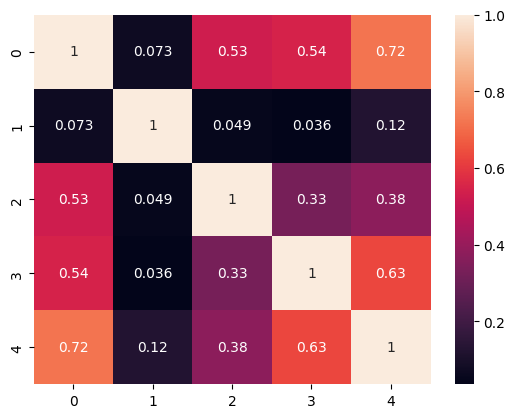

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True)
plt.show()

In [20]:
(sentences)

['Artificial intelligence is transforming industries across the globe.',
 'The quick brown fox jumps over the lazy dog.',
 "Climate change poses a significant threat to our planet's future.",
 'Learning new languages can enhance cognitive abilities and cultural understanding.',
 'The future of technology lies in the integration of machine learning and human creativity.']